In [148]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from sklearn.compose import ColumnTransformer

In [149]:
df = pd.read_csv('titanic_train.csv')

In [150]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
537,538,1,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.4250,NaN,C
517,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
573,574,1,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,NaN,Q
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S
304,305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S
624,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.1000,NaN,S
135,136,0,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C


In [151]:
df.isna().sum() #checking for null values if any

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [152]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [153]:
df['Age'].fillna(df['Age'].mean(),inplace=True) #filling the null values

In [154]:
df['Age'].mode()

0    29.699118
Name: Age, dtype: float64

In [155]:
df_sub = df[['Survived','Age','Fare']]

In [156]:
df_sub.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [157]:
target = df_sub.iloc[:,0]

In [158]:
input = df_sub.iloc[:,1:]

In [159]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [160]:
input

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [161]:
X_train, X_test, y_train, y_test = train_test_split(input,target,test_size=0.25) #train test split

In [162]:
X_train.shape

(668, 2)

In [163]:
X_test.shape

(223, 2)

<ipython-input-164-e444bf3caffc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


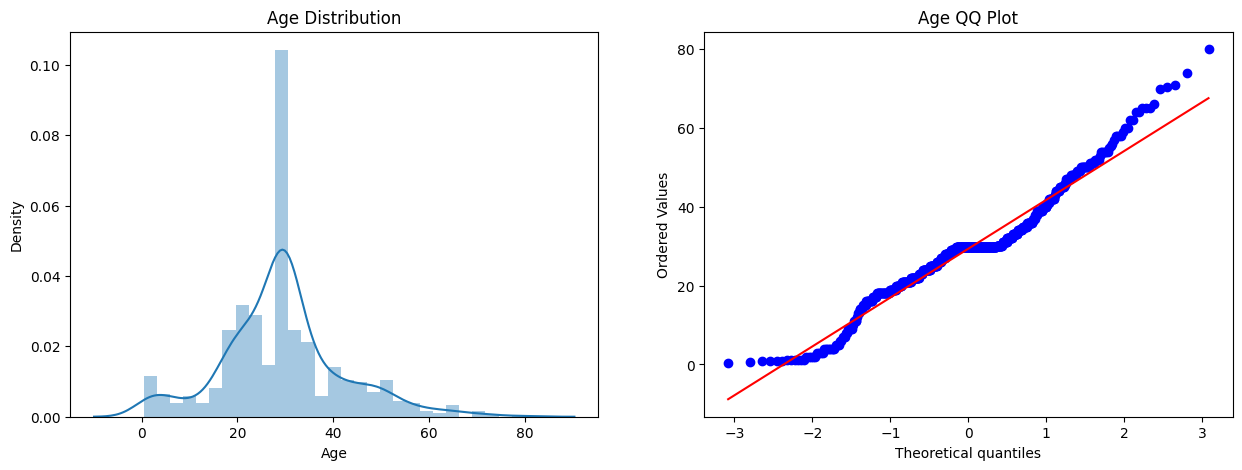

In [164]:
#checking the age distribution by ploting distplot and QQ Plot
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title("Age Distribution")
plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')
plt.show()

It appears to be slightly skewed conforming to normality

<ipython-input-165-155c7b59c277>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


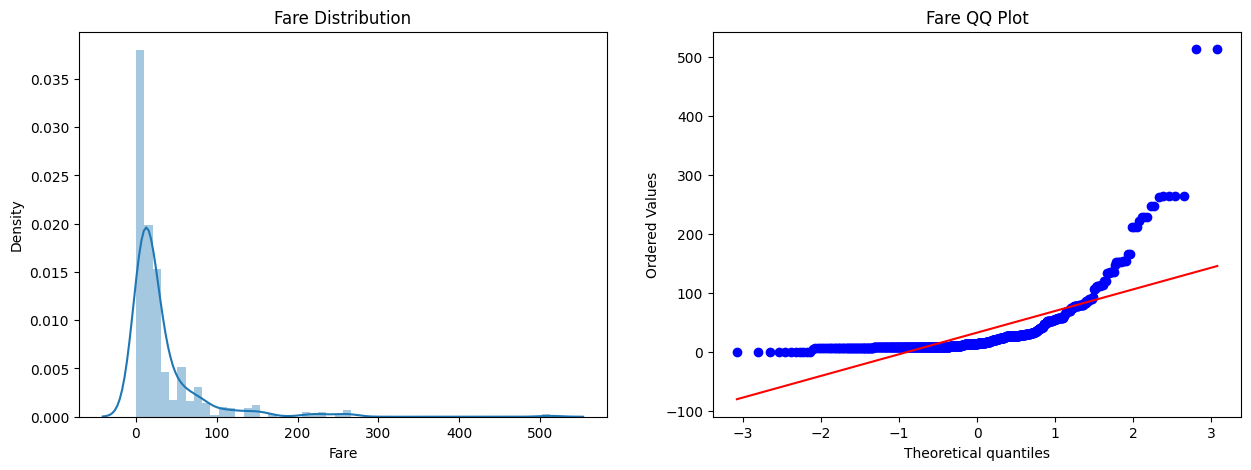

In [165]:
#similarly plotting for fare distribution
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title("Fare Distribution")
plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')
plt.show()

Here you can view that the distribution is extremely skewed

In [166]:
lr1 = LogisticRegression() #running the models without any transformations
dt1 = DecisionTreeClassifier()

In [167]:
lr1.fit(X_train,y_train)
dt1.fit(X_train,y_train)

DecisionTreeClassifier()

In [168]:
y_lrpred = lr1.predict(X_test)
y_dtpred = dt1.predict(X_test)

print("Accuracy Logistic Regression",accuracy_score(y_test,y_lrpred))
print("Accuracy DT",accuracy_score(y_test,y_dtpred))

Accuracy Logistic Regression 0.6681614349775785
Accuracy DT 0.6143497757847534


In [169]:
print("LR",np.mean(cross_val_score(lr1,X_train,y_train,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(dt1,X_train,y_train,scoring='accuracy',cv=10)))

LR 0.6525327905924921
DT 0.6436001809136138


In [170]:
# custom function for transforming a variable's distribution
def applyTransformationAndPlot(feature,function,type_):
  ft = FunctionTransformer(func=function)
  X_train_transform = ft.fit_transform(X_train[feature])
  print("Shape : ",X_train_transform.shape)
  plt.figure(figsize=(15,5))
  plt.subplot(121)
  sns.distplot(X_train_transform)
  plt.title(f"{type_} Transformation: {feature} Distribution")
  plt.subplot(122)
  stats.probplot(X_train_transform, dist="norm", plot=plt)
  plt.title(f'{feature} QQ Plot')
  plt.show()


In [171]:
# custom function for transforming a variable's distribution
def applyPowerTransformationAndPlot(feature,isBoxCox):
  ft = PowerTransformer(method = 'box-cox' if isBoxCox else 'yeo-johnson')
  X_train[feature] = X_train[feature]+0.00001 #to avoid an error thrown by box-cox method for zero numbered values
  X_train_transform = ft.fit_transform(X_train[feature].to_numpy().reshape(-1,1))
  print("Shape : ",X_train_transform.shape)
  print("Lambdas : ",ft.lambdas_)
  plt.figure(figsize=(15,5))
  plt.subplot(121)
  sns.distplot(X_train_transform)
  plt.title(f"{'Box-Cox' if isBoxCox else'Yeo-Johnson'} Transformation: {feature} Distribution")
  plt.subplot(122)
  stats.probplot(X_train_transform.ravel(), dist="norm", plot=plt)
  plt.title(f'{feature} QQ Plot')
  plt.show()

Shape :  (668, 1)
Lambdas :  [0.83373222]


<ipython-input-171-3bf269c8c0ac>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transform)


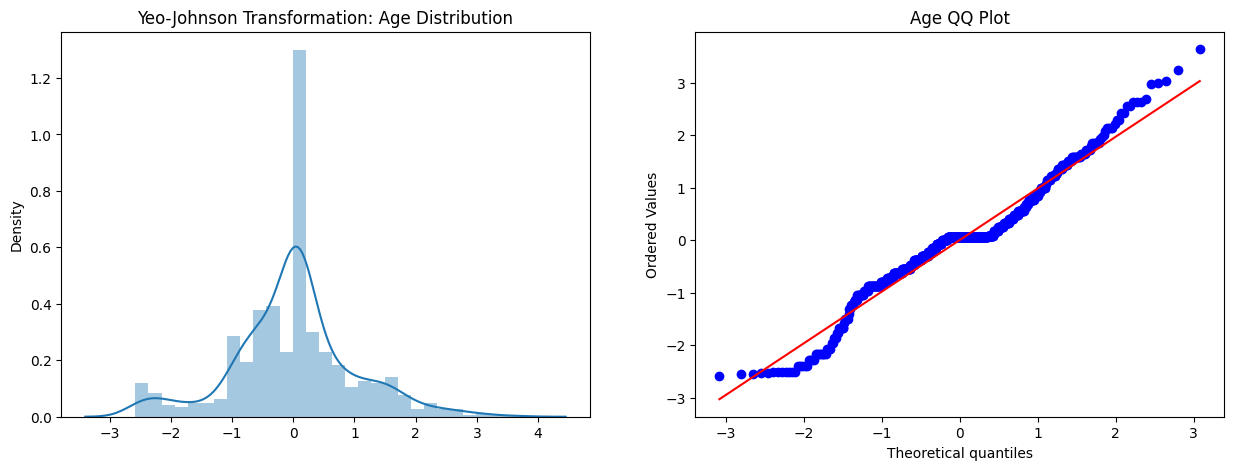

In [172]:
applyPowerTransformationAndPlot('Age',False)

Shape :  (668, 1)
Lambdas :  [0.83580051]


<ipython-input-171-3bf269c8c0ac>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transform)


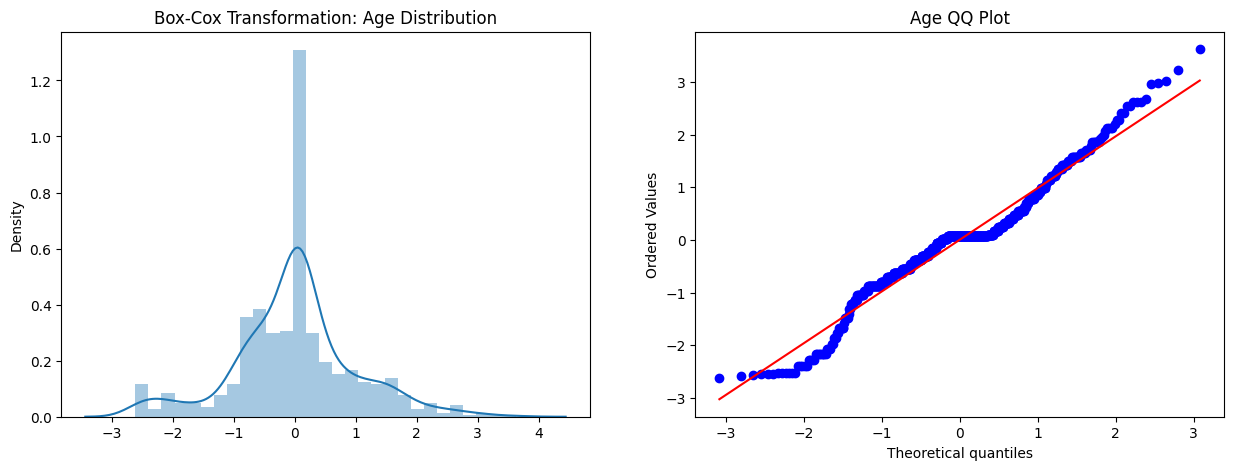

In [173]:
applyPowerTransformationAndPlot('Age',True)

Shape :  (668,)


<ipython-input-170-44937a5673a7>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transform)


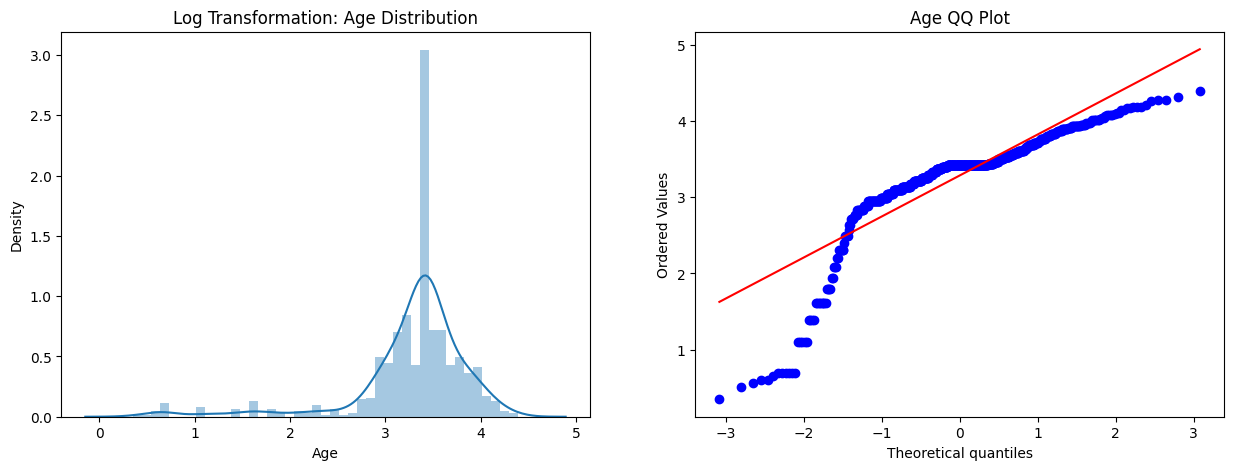

In [174]:
applyTransformationAndPlot('Age',np.log1p,'Log') #transforming age with log transformation

The transformation has changed the distribution in a negative way. It has made the distribution extremely skewed

In [175]:
len(X_train['Age'] == 0)

668

Shape :  (668,)


<ipython-input-170-44937a5673a7>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transform)


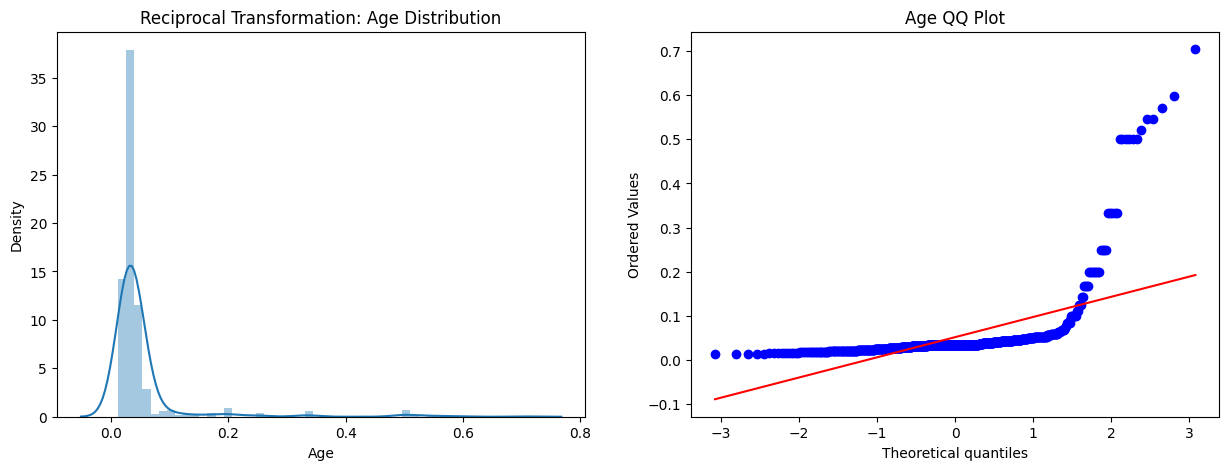

In [176]:
applyTransformationAndPlot('Age',lambda x: 1/(x+1),'Reciprocal') #now applying reciprocal transformation

Again the results are not quite as expected

Shape :  (668,)


<ipython-input-170-44937a5673a7>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transform)


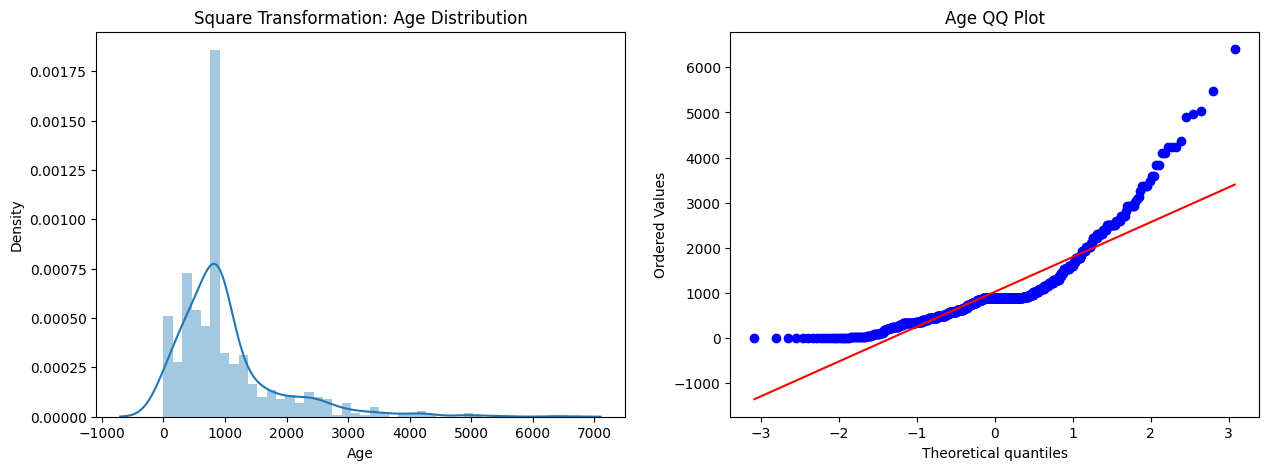

In [177]:
applyTransformationAndPlot('Age',lambda x: x**2, 'Square') # square transformation

Shape :  (668, 1)
Lambdas :  [-0.11294217]


<ipython-input-171-3bf269c8c0ac>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transform)


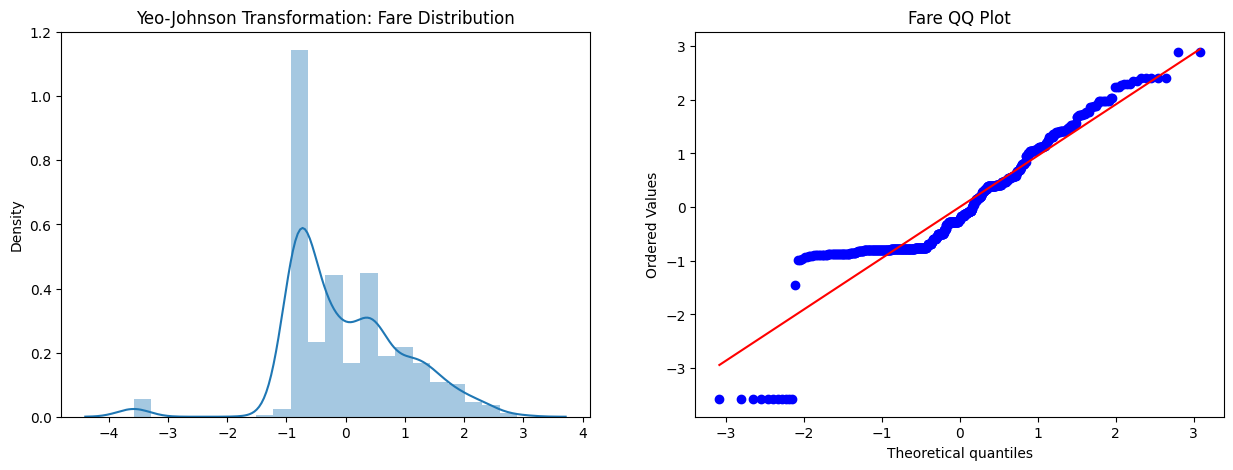

In [178]:
applyPowerTransformationAndPlot('Fare',isBoxCox=False)

Shape :  (668, 1)
Lambdas :  [0.22416125]


<ipython-input-171-3bf269c8c0ac>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transform)


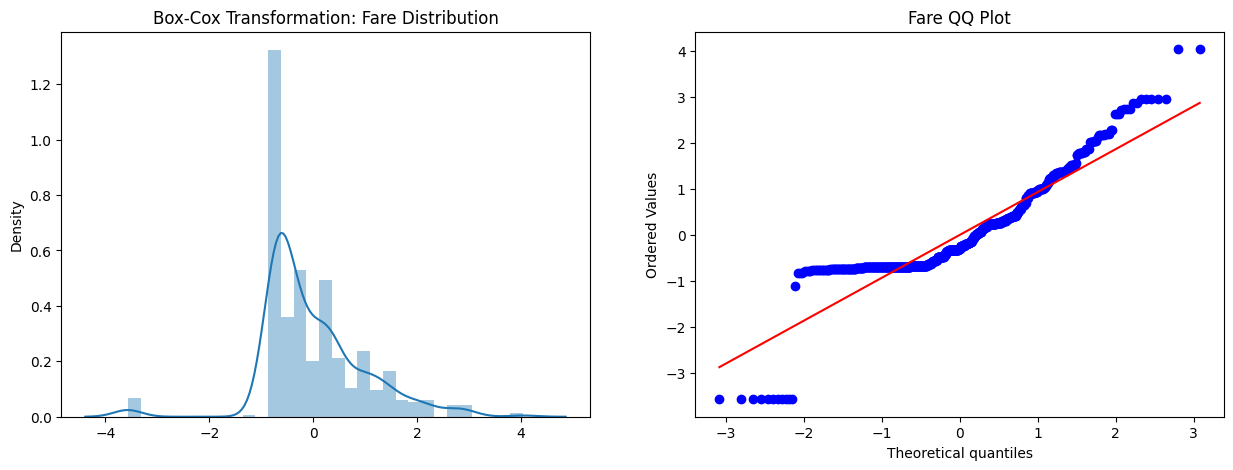

In [179]:
applyPowerTransformationAndPlot('Fare',isBoxCox=True)

Shape :  (668,)


<ipython-input-170-44937a5673a7>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transform)


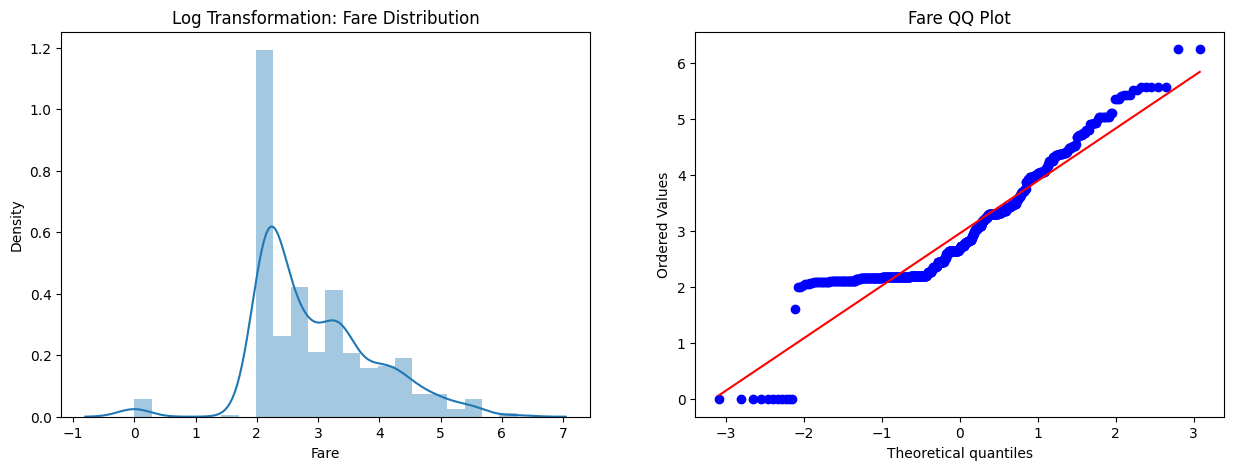

In [180]:
applyTransformationAndPlot('Fare',np.log1p,'Log') #applying log transformation to the fare feature

You can see it has changed the distribution to a slight normal distribution. Better than the earlier distibution

Shape :  (668,)


<ipython-input-170-44937a5673a7>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transform)


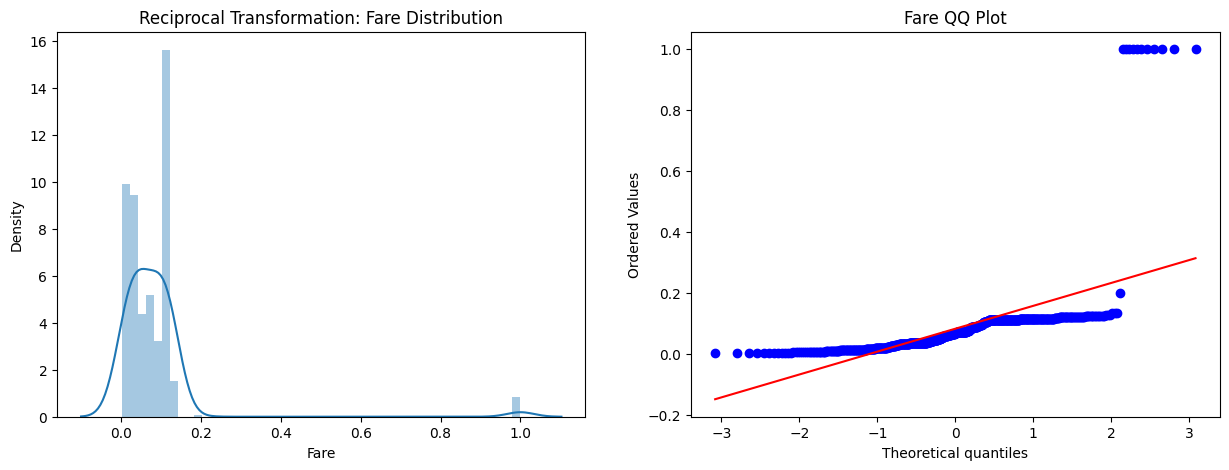

In [181]:
applyTransformationAndPlot('Fare',lambda x: 1/(x+1),'Reciprocal')

Shape :  (668,)


<ipython-input-170-44937a5673a7>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transform)


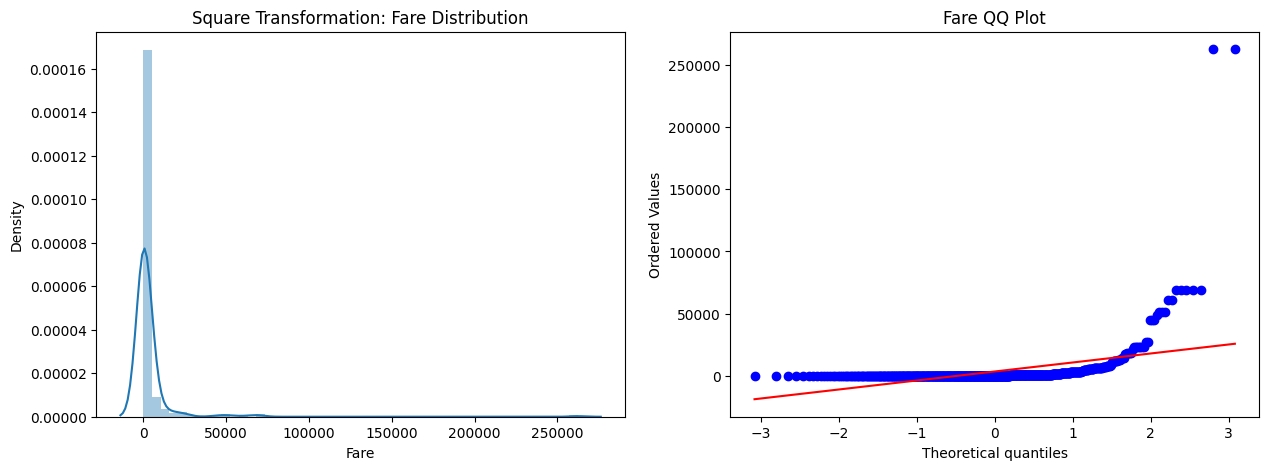

In [182]:
applyTransformationAndPlot('Fare',lambda x: x**2, 'Square')

Shape :  (668,)


<ipython-input-170-44937a5673a7>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transform)


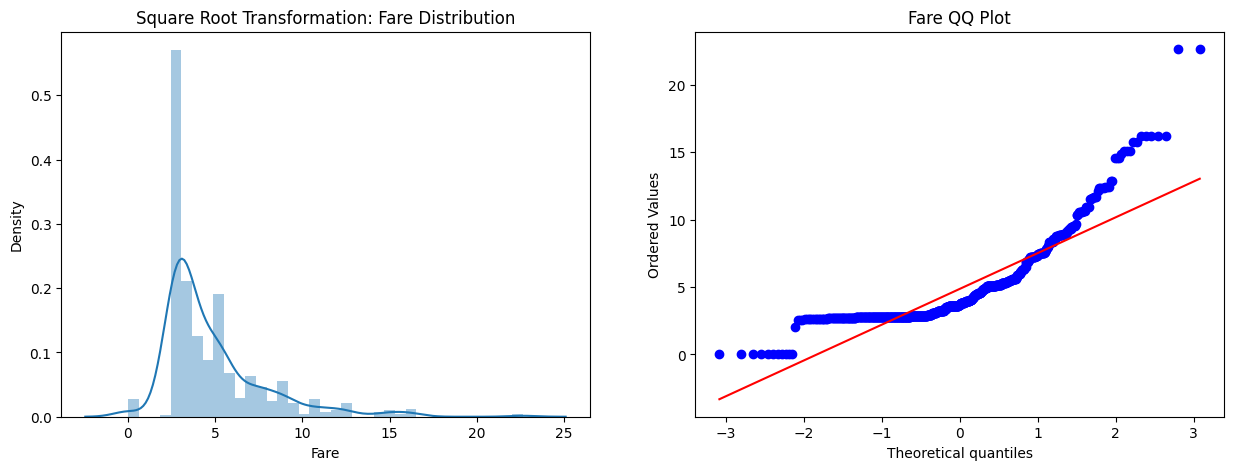

In [183]:
applyTransformationAndPlot('Fare',lambda x: np.sqrt(x), 'Square Root')

In [184]:
# so after checking which transformation helps us get good results, we will be moving forward with log distribution applied to fare feature where as no transformations are being applied to age feature
ft2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_new = ft2.fit_transform(X_train)
X_test_new = ft2.transform(X_test)

In [185]:
X_train

,Age,Fare
609,40.000020,153.46252
305,0.920020,151.55002
666,25.000020,13.00002
759,33.000020,86.50002
761,41.000020,7.12502
...,...,...
823,27.000020,12.47502
596,29.699138,33.00002
287,22.000020,7.89582
383,35.000020,52.00002


In [186]:
X_train_new

array([[ 5.03995148, 40.00002   ],
       [ 5.02749254,  0.92002   ],
       [ 2.63905876, 25.00002   ],
       ...,
       [ 2.1855815 , 22.00002   ],
       [ 3.97029229, 35.00002   ],
       [ 2.1671456 , 29.69913765]])

In [187]:
lr2 = LogisticRegression()
dt2 = DecisionTreeClassifier()

In [188]:
lr2.fit(X_train_new,y_train)
dt2.fit(X_train_new,y_train)

DecisionTreeClassifier()

In [189]:
y_lrpred = lr2.predict(X_test_new)
y_dtpred = dt2.predict(X_test_new)

print("Accuracy LR",accuracy_score(y_test,y_lrpred))
print("Accuracy DT",accuracy_score(y_test,y_dtpred))

Accuracy LR 0.672645739910314
Accuracy DT 0.6188340807174888


In [190]:
print("LR",np.mean(cross_val_score(lr2,X_train_new,y_train,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(dt2,X_train_new,y_train,scoring='accuracy',cv=10)))

LR 0.6599728629579376
DT 0.639077340569878


In [191]:
# applying yeo-johnson to fare to see if we can improve the results or not
ft3 = ColumnTransformer([('yeo-johnson',PowerTransformer(method='yeo-johnson'),['Fare'])],remainder='passthrough')

X_train_new = ft3.fit_transform(X_train)
X_test_new = ft3.transform(X_test)

In [192]:
lr3 = LogisticRegression()
dt3 = DecisionTreeClassifier()

In [193]:
lr3.fit(X_train_new,y_train)
dt3.fit(X_train_new,y_train)

DecisionTreeClassifier()

In [194]:
y_lrpred = lr3.predict(X_test_new)
y_dtpred = dt3.predict(X_test_new)

print("Accuracy LR",accuracy_score(y_test,y_lrpred))
print("Accuracy DT",accuracy_score(y_test,y_dtpred))

Accuracy LR 0.6636771300448431
Accuracy DT 0.6098654708520179


In [195]:
print("LR",np.mean(cross_val_score(lr3,X_train_new,y_train,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(dt3,X_train_new,y_train,scoring='accuracy',cv=10)))

LR 0.6659656264133875
DT 0.6451153324287653


You can see after a minor transformation, our accuracy for logistic regression increased by 2% where as it has no effect on Decision Tree. Yeo-Johnson performed slightly better than the log transformation